In [1]:
import pandas as pd
import pyarrow.parquet as pq
from sklearn.metrics import classification_report
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection and Preprocessing

In [2]:
table = pq.read_table('data/iot.parquet')

# Convert the table to a Pandas dataframe
df = table.to_pandas()

In [3]:
df.value_counts('detailed_label')


detailed_label
PartOfAHorizontalPortScan        43921134
Okiru                            13487413
benign                           11585824
DDoS                              2943063
C&C                                 21779
C&C-HeartBeat                       21331
Attack                               3396
C&C-PartOfAHorizontalPortScan         878
dtype: int64

In [4]:
df_majority = df[df.labels == 1]
df_minority7 = df[df.detailed_label == 'benign']

df_majority_downsampled = df_majority.sample(n=723857, random_state=42)
df_minority7_downsampled = df_minority7.sample(n=713857, random_state=42)

# Combine the downsampled majority class and all the minority classes
df_downsampled = pd.concat([df_majority_downsampled, df_minority7_downsampled])

# Shuffle the DataFrame
df_d = df_downsampled.sample(frac=1, random_state=42)

In [5]:
df_d.value_counts('detailed_label')

detailed_label
benign                           713857
PartOfAHorizontalPortScan        526299
Okiru                            161870
DDoS                              35103
C&C-HeartBeat                       271
C&C                                 261
Attack                               39
C&C-PartOfAHorizontalPortScan        14
dtype: int64

In [6]:
df_d.to_csv("data/df_equalsampled.csv")

# -----------------------------------------------------------------

In [2]:
df_d  = pd.read_csv("data/df_equalsampled.csv")

In [3]:
df_d = df_d.iloc[:,1:]

In [4]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437714 entries, 0 to 1437713
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1437714 non-null  float64
 1   id_orig_h       1437714 non-null  float64
 2   id_orig_p       1437714 non-null  float64
 3   id_resp_h       1437714 non-null  float64
 4   id_resp_p       1437714 non-null  float64
 5   proto           1437714 non-null  object 
 6   duration        1437714 non-null  float64
 7   orig_bytes      1437714 non-null  int64  
 8   resp_bytes      1437714 non-null  int64  
 9   conn_state      1437714 non-null  object 
 10  missed_bytes    1437714 non-null  float64
 11  history         1437273 non-null  object 
 12  orig_pkts       1437714 non-null  float64
 13  orig_ip_bytes   1437714 non-null  float64
 14  resp_pkts       1437714 non-null  float64
 15  resp_ip_bytes   1437714 non-null  float64
 16  detailed_label  1437714 non-null  ob

In [5]:
def map_label(label):
    if label == 1:
        return "malicious"
    else:
        return "benign"

# example usage
df_d["labels"] = df_d["labels"].apply(map_label)

In [6]:
df_d["super_label"] = df_d["labels"]  + "_" + df_d["detailed_label"]


In [7]:
df_s = df_d.drop(columns=["detailed_label"])

In [8]:
df_s

,ts,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,labels,super_label
0,1.547084e+09,3.232236e+09,46997.0,1.741274e+09,22.0,tcp,0.0,0,0,S0,0.0,S,1.0,40.0,0.0,0.0,malicious,malicious_PartOfAHorizontalPortScan
1,1.545434e+09,3.232236e+09,40906.0,1.692058e+09,23.0,tcp,0.0,0,0,S0,0.0,S,1.0,60.0,0.0,0.0,benign,benign_benign
2,1.547148e+09,3.232236e+09,50708.0,3.569210e+07,23.0,tcp,0.0,0,0,S0,0.0,S,1.0,40.0,0.0,0.0,benign,benign_benign
3,1.547145e+09,3.232236e+09,25542.0,3.262870e+09,23.0,tcp,0.0,0,0,S0,0.0,S,1.0,40.0,0.0,0.0,benign,benign_benign
4,1.547146e+09,3.232236e+09,50708.0,2.785092e+09,23.0,tcp,0.0,0,0,S0,0.0,S,1.0,40.0,0.0,0.0,benign,benign_benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437709,1.547071e+09,3.232236e+09,40765.0,9.886176e+08,22.0,tcp,0.0,0,0,S0,0.0,S,1.0,40.0,0.0,0.0,malicious,malicious_PartOfAHorizontalPortScan
1437710,1.547147e+09,3.232236e+09,52989.0,1.604247e+09,23.0,tcp,0.0,0,0,S0,0.0,S,1.0,40.0,0.0,0.0,benign,benign_benign
1437711,1.545448e+09,3.232236e+09,36097.0,3.695995e+09,37215.0,tcp,0.0,0,0,S0,0.0,S,1.0,40.0,0.0,0.0,malicious,malicious_Okiru
1437712,1.547076e+09,3.232236e+09,44476.0,1.016251e+09,22.0,tcp,0.0,0,0,S0,0.0,S,1.0,40.0,0.0,0.0,malicious,malicious_PartOfAHorizontalPortScan


<AxesSubplot: ylabel='labels'>

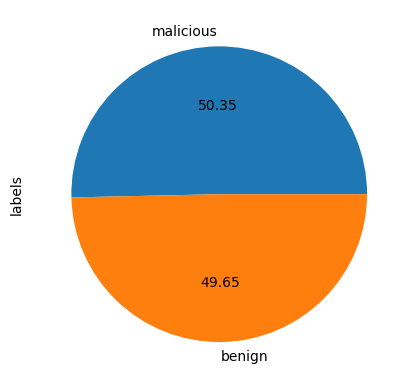

In [9]:
df_d['labels'].value_counts().plot(kind='pie', autopct='%.2f')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
df_s[["ts","id_orig_h","id_orig_p","id_resp_h"]] = scaler.fit_transform(df_s[["ts","id_orig_h","id_orig_p","id_resp_h"]])

In [12]:
df_s.value_counts("super_label")

super_label
benign_benign                              713857
malicious_PartOfAHorizontalPortScan        526299
malicious_Okiru                            161870
malicious_DDoS                              35103
malicious_C&C-HeartBeat                       271
malicious_C&C                                 261
malicious_Attack                               39
malicious_C&C-PartOfAHorizontalPortScan        14
dtype: int64

In [14]:
df_s[["id_resp_p","duration","orig_bytes","resp_bytes","missed_bytes","orig_pkts","orig_ip_bytes","resp_pkts","resp_ip_bytes"]] = scaler.fit_transform(df_s[["id_resp_p","duration","orig_bytes","resp_bytes","missed_bytes","orig_pkts","orig_ip_bytes","resp_pkts","resp_ip_bytes"]])

In [15]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset

# Encode the labels column using LabelEncoder
le = LabelEncoder()
df_s['super_label'] = le.fit_transform(df_s['super_label'])
df_s['labels'] = le.fit_transform(df_s['labels'])
df_s['history'] = le.fit_transform(df_s['history'])


# One hot encoding
df_s = pd.get_dummies(df_s, columns=['proto'])
df_s = pd.get_dummies(df_s, columns=['conn_state'])



In [16]:
df_s

,ts,id_orig_h,id_orig_p,id_resp_h,id_resp_p,duration,orig_bytes,resp_bytes,missed_bytes,history,...,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH
0,0.098744,0.009686,0.499769,-0.293327,-0.531045,-0.048685,-0.001284,-0.006228,-0.001123,8,...,0,0,0,0,1,0,0,0,0,0
1,-0.257148,0.009686,0.121484,-0.340883,-0.530993,-0.048685,-0.001284,-0.006228,-0.001123,8,...,0,0,0,0,1,0,0,0,0,0
2,0.112595,0.009686,0.730243,-1.941372,-0.530993,-0.048685,-0.001284,-0.006228,-0.001123,8,...,0,0,0,0,1,0,0,0,0,0
3,0.111948,0.009686,-0.832705,1.176939,-0.530993,-0.048685,-0.001284,-0.006228,-0.001123,8,...,0,0,0,0,1,0,0,0,0,0
4,0.112207,0.009686,0.730243,0.715278,-0.530993,-0.048685,-0.001284,-0.006228,-0.001123,8,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437709,0.095939,0.009686,0.112727,-1.020593,-0.531045,-0.048685,-0.001284,-0.006228,-0.001123,8,...,0,0,0,0,1,0,0,0,0,0
1437710,0.112358,0.009686,0.871905,-0.425731,-0.530993,-0.048685,-0.001284,-0.006228,-0.001123,8,...,0,0,0,0,1,0,0,0,0,0
1437711,-0.254235,0.009686,-0.177181,1.595452,1.389595,-0.048685,-0.001284,-0.006228,-0.001123,8,...,0,0,0,0,1,0,0,0,0,0
1437712,0.096931,0.009686,0.343201,-0.993892,-0.531045,-0.048685,-0.001284,-0.006228,-0.001123,8,...,0,0,0,0,1,0,0,0,0,0


In [17]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437714 entries, 0 to 1437713
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ts                 1437714 non-null  float64
 1   id_orig_h          1437714 non-null  float64
 2   id_orig_p          1437714 non-null  float64
 3   id_resp_h          1437714 non-null  float64
 4   id_resp_p          1437714 non-null  float64
 5   duration           1437714 non-null  float64
 6   orig_bytes         1437714 non-null  float64
 7   resp_bytes         1437714 non-null  float64
 8   missed_bytes       1437714 non-null  float64
 9   history            1437714 non-null  int64  
 10  orig_pkts          1437714 non-null  float64
 11  orig_ip_bytes      1437714 non-null  float64
 12  resp_pkts          1437714 non-null  float64
 13  resp_ip_bytes      1437714 non-null  float64
 14  labels             1437714 non-null  int64  
 15  super_label        1437714 non-n

In [19]:
X = df_s.drop(columns = ["labels","super_label"])
y = df_s.iloc[:,14]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train),average='macro',zero_division=1)
    test_precision = metrics.precision_score(y_test, model.predict(X_test),average='macro',zero_division=1)
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train),average='macro',zero_division=1)
    test_recall = metrics.recall_score(y_test, model.predict(X_test),average='macro',zero_division=1)
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {} || Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + "{} || Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + "  {}  || Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=["benign","malicious"])

    fig, ax = plt.subplots(figsize=(5,5))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [22]:
from sklearn.metrics import roc_curve, auc
def plot_roc(model,X_test):
    y_pred_prob_rf = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob_rf[:, i], pos_label=model.classes_[i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple'] # You can add more colors for more classes
    for i, color in zip(range(len(model.classes_)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
end = time.time()
print("Time taken by Random Forest Classifier:", end - start)

Time taken by Random Forest Classifier: 76.29419708251953


In [24]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142581
           1       1.00      1.00      1.00    144962

    accuracy                           1.00    287543
   macro avg       1.00      1.00      1.00    287543
weighted avg       1.00      1.00      1.00    287543



Training Accuracy Random Forest 100.0 || Test Accuracy Random Forest 99.99930445185589
Training Precesion Random Forest100.0 || Test Precesion Random Forest 99.99929865411725
Training Recall Random Forest  100.0  || Test Recall Random Forest 99.999310164043


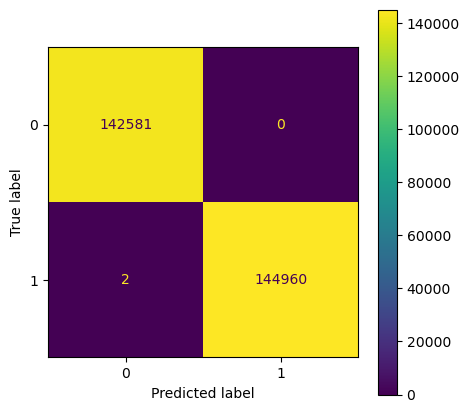

In [26]:
evaluate_classification(model, "Random Forest", X_train, X_test, y_train, y_test)

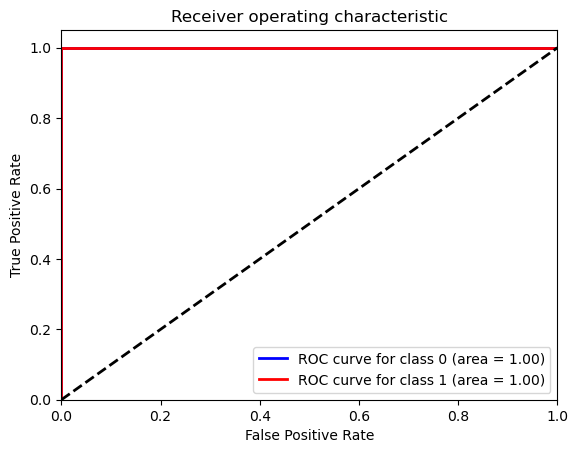

In [27]:
plot_roc(model,X_test)

##  Decision Tree 

In [28]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tdt = DecisionTreeClassifier().fit(X_train, y_train)
end = time.time()
print(f"Time taken by Decision Tree: {end - start}s" )

Time taken by Decision Tree: 5.136792898178101s


In [29]:
y_pred = tdt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142581
           1       1.00      1.00      1.00    144962

    accuracy                           1.00    287543
   macro avg       1.00      1.00      1.00    287543
weighted avg       1.00      1.00      1.00    287543



Training Accuracy Decision Tree 100.0 || Test Accuracy Decision Tree 99.99930445185589
Training Precesion Decision Tree100.0 || Test Precesion Decision Tree 99.99930440416118
Training Recall Decision Tree  100.0  || Test Recall Decision Tree 99.99930440416118


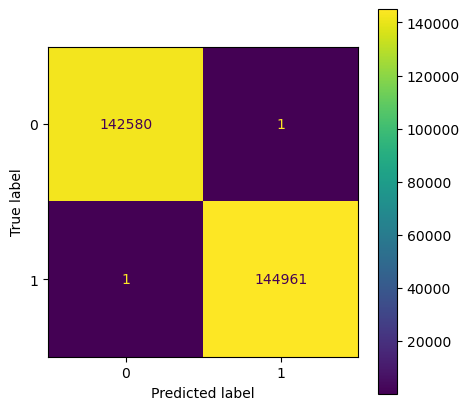

In [30]:
evaluate_classification(tdt, "Decision Tree", X_train, X_test, y_train, y_test)

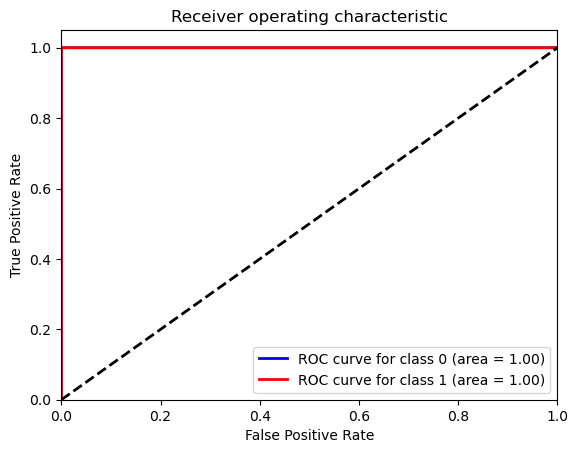

In [31]:
plot_roc(tdt,X_test)

#  Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
start = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
end = time.time()
print(f"Time taken by Naive Bayes: {end - start}s" )

Time taken by Naive Bayes: 0.6531546115875244s


In [33]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80    142581
           1       1.00      0.52      0.68    144962

    accuracy                           0.76    287543
   macro avg       0.84      0.76      0.74    287543
weighted avg       0.84      0.76      0.74    287543



Training Accuracy Naive Bayes 75.80542371525625 || Test Accuracy Naive Bayes 75.70172113388259
Training Precesion Naive Bayes83.59844657523288 || Test Precesion Naive Bayes 83.53547798750213
Training Recall Naive Bayes  75.9644529177683  || Test Recall Naive Bayes 75.90106332208804


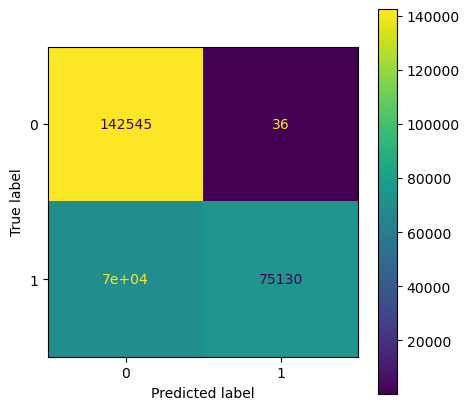

In [34]:
evaluate_classification(nb, "Naive Bayes", X_train, X_test, y_train, y_test)

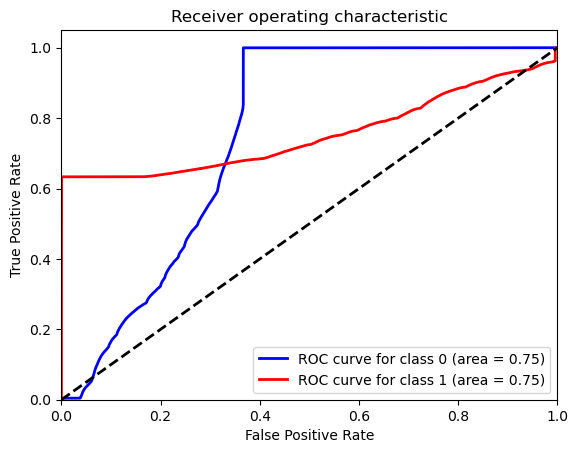

In [35]:
plot_roc(nb,X_test)

# MLP

In [36]:
from sklearn.neural_network import MLPClassifier
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
end = time.time()
print(f"Time taken by MLP: {end - start}s" )

Time taken by MLP: 554.8701391220093s


In [37]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142581
           1       1.00      1.00      1.00    144962

    accuracy                           1.00    287543
   macro avg       1.00      1.00      1.00    287543
weighted avg       1.00      1.00      1.00    287543



Training Accuracy MLP 99.99573976391336 || Test Accuracy MLP 99.99374006670307
Training Precesion MLP99.99571396934891 || Test Precesion MLP 99.99369418923096
Training Recall MLP  99.995765495157  || Test Recall MLP 99.99378571650512


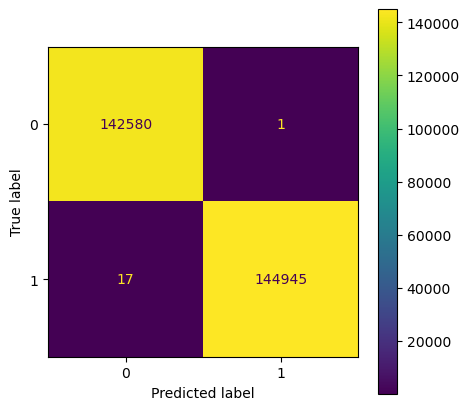

In [38]:
evaluate_classification(clf, "MLP", X_train, X_test, y_train, y_test)

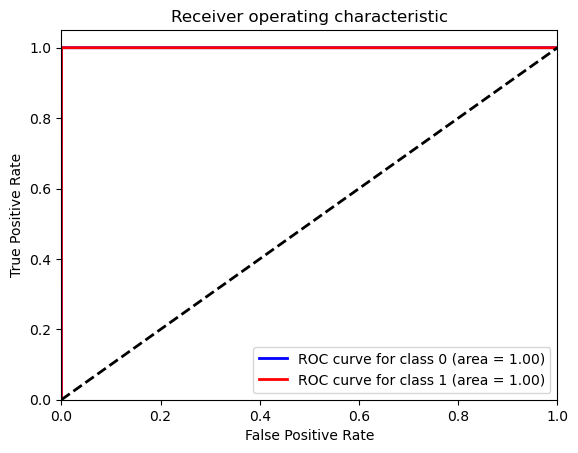

In [39]:
plot_roc(clf,X_test)

## KNN MODEL 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
end = time.time()
print(f"Time taken by KNN: {end - start}s" )

Time taken by KNN: 0.17143487930297852s


In [41]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142581
           1       1.00      1.00      1.00    144962

    accuracy                           1.00    287543
   macro avg       1.00      1.00      1.00    287543
weighted avg       1.00      1.00      1.00    287543



Training Accuracy KNN 99.99739169219185 || Test Accuracy KNN 99.99617448520743
Training Precesion KNN99.99738812777765 || Test Precesion KNN 99.99618288316033
Training Recall KNN  99.99739503349217  || Test Recall KNN 99.99616558306386


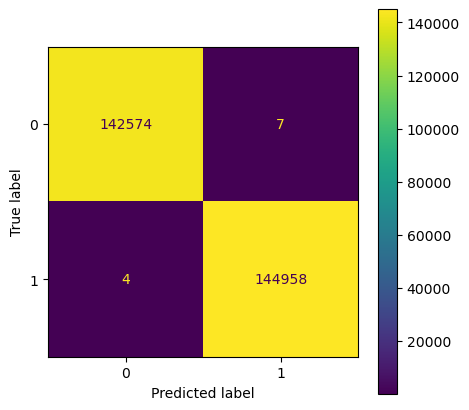

In [42]:
evaluate_classification(knn, "KNN", X_train, X_test, y_train, y_test)

In [45]:
#### y_pred_knn = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

NameError: name 'y_pred_knn' is not defined

In [43]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()


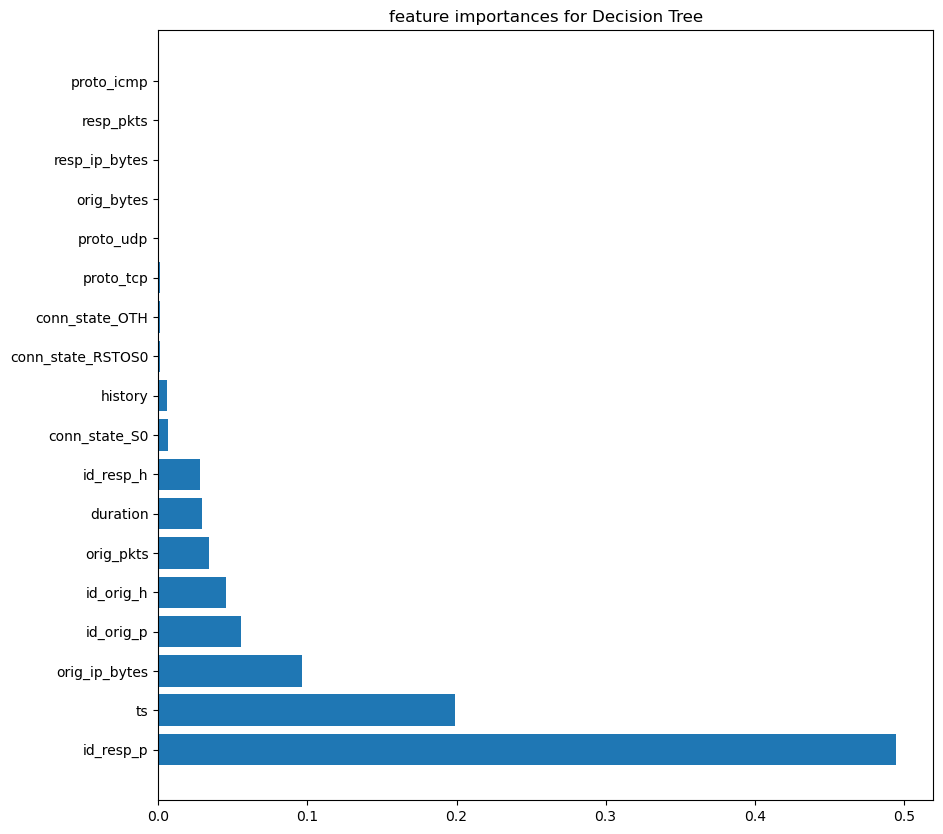

In [44]:
features_names = df_s.drop(['labels', 'super_label'] , axis = 1)
f_importances(abs(model.feature_importances_), features_names, top=18)